In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


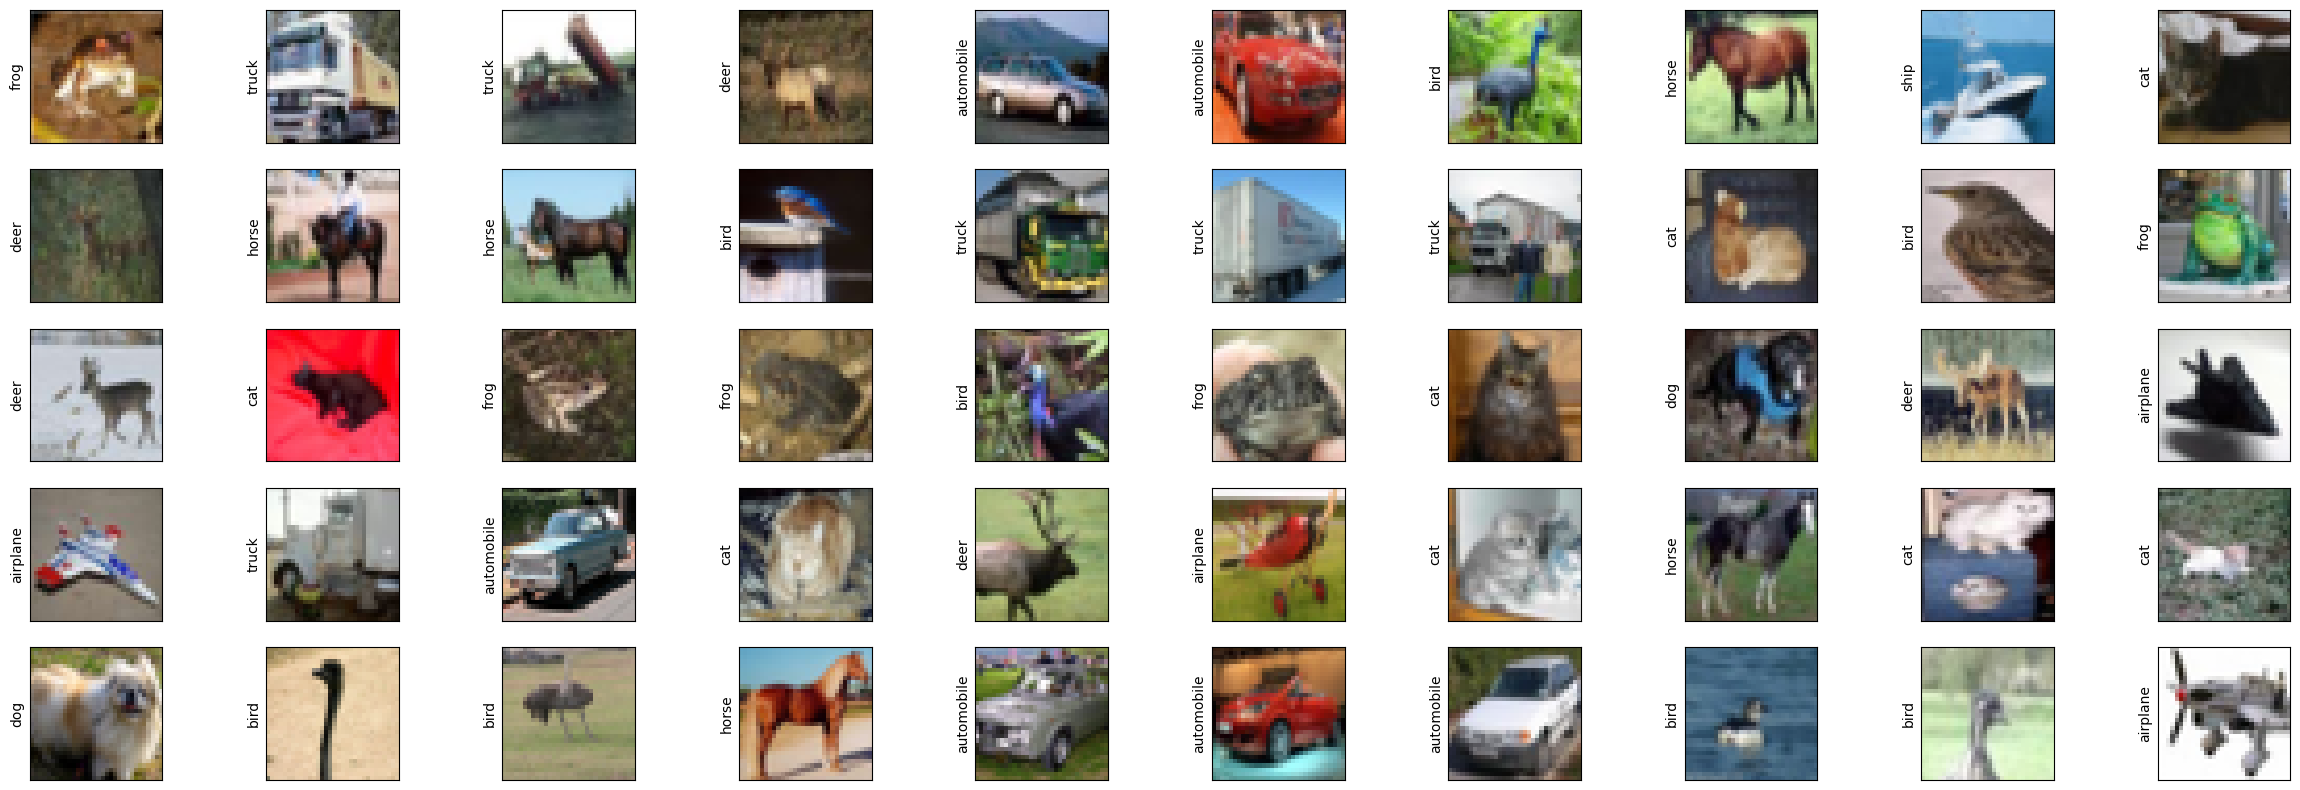

In [4]:
plt.figure(figsize=(30,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),

    layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])


In [14]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)  # or any value you want
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
h = model.fit(x=X_train, y=Y_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9192 - loss: 0.2266 - val_accuracy: 0.7853 - val_loss: 0.8643
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.9210 - loss: 0.2242 - val_accuracy: 0.7837 - val_loss: 0.8738
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9220 - loss: 0.2149 - val_accuracy: 0.7845 - val_loss: 0.8992
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9254 - loss: 0.2099 - val_accuracy: 0.7824 - val_loss: 0.8973
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9297 - loss: 0.1975 - val_accuracy: 0.7846 - val_loss: 0.9223
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9326 - loss: 0.1882 - val_accuracy: 0.7832 - val_loss: 0.9456
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9316 - loss: 0.1877 - val_accuracy: 0.7851 - val_loss: 0.9439
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9311 -

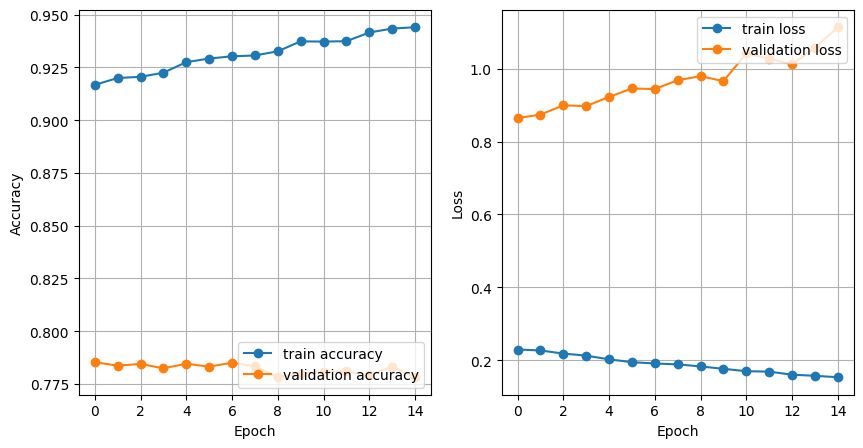

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7794 - loss: 1.1549

Test Accuracy: 0.7785999774932861

Test Loss: 1.1531997919082642


In [27]:
predictions = model.predict(X_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([1.2943521e-07, 2.6040187e-10, 1.4383569e-08, 2.2867450e-01,
       2.3053328e-08, 7.7132142e-01, 3.1888528e-06, 6.3724582e-07,
       1.5698204e-08, 2.2096027e-09], dtype=float32)

In [28]:
np.argmax(predictions[0])

np.int64(5)

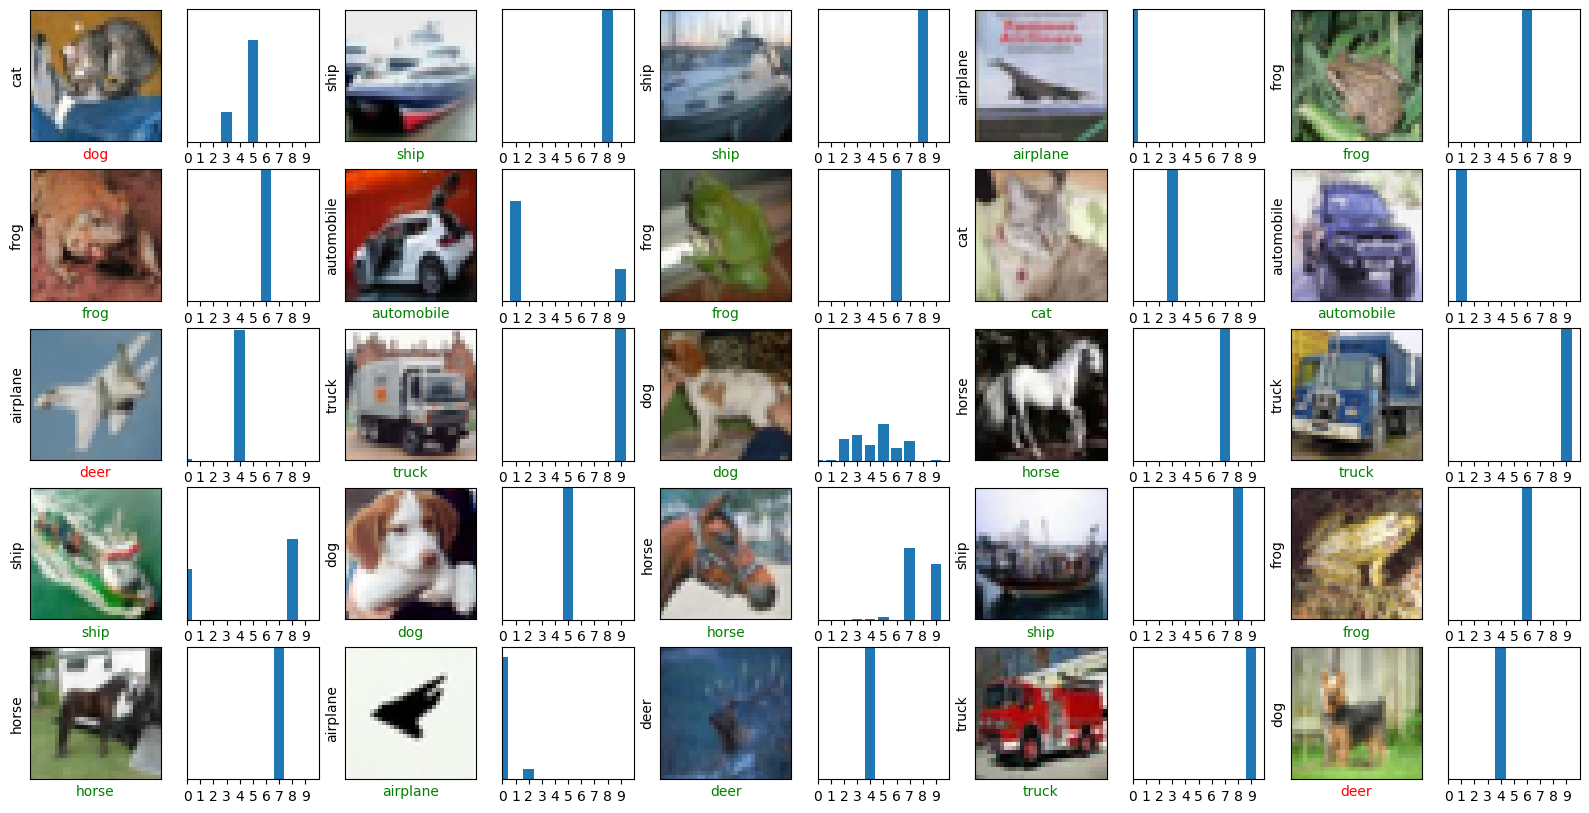

In [29]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()